In [3]:
from pathlib import Path
import pickle

# Assuming src is in the python path or adjust sys.path if needed
import sys
sys.path.append('../')

# Find parent directory
root = Path().resolve().parent

# Collect pickle files
pickle_files = list(root.glob('*.pkl')) + list(root.glob('*.pickle'))
if not pickle_files:
    raise FileNotFoundError(f"No pickle files found in {root}")

# Identify the most recently modified one
latest_file = max(pickle_files, key=lambda p: p.stat().st_mtime)
print(f"Loading the most recent file: {latest_file}")

# Load it as episodes
with open(latest_file, 'rb') as f:
    episodes = pickle.load(f)

Loading the most recent file: E:\space-deck-builder\experiences_1000_20250417_101308.pkl


### Health Difference Distribution
Compute the net health difference between the first and second player for each episode and plot its distribution.

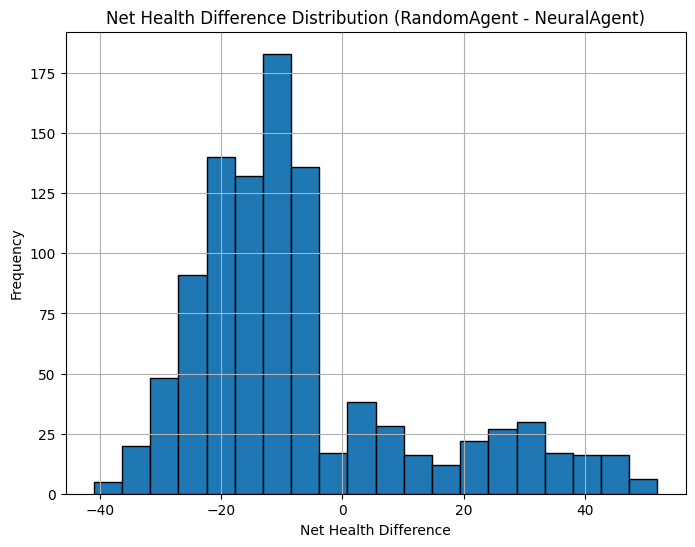

In [4]:
import matplotlib.pyplot as plt

# Identify player names from stats
first_name, second_name = list(episodes[0][1].player_stats.keys())

# Compute net health difference for each episode
diffs = []
for experiences, stats, winner in episodes:
    ps = stats.player_stats
    net1 = ps[first_name].authority_gained - ps[second_name].damage_dealt
    net2 = ps[second_name].authority_gained - ps[first_name].damage_dealt
    diffs.append(net1 - net2)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(diffs, bins=20, edgecolor='black')
plt.title(f'Net Health Difference Distribution ({first_name} - {second_name})')
plt.xlabel('Net Health Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Damage Dealt Distribution
Compute the total damage dealt by each player across all episodes and plot its distribution.

In [ ]:
# Aggregate damage dealt per player
damage_data = {first_name: [], second_name: []}
for _, stats, _ in episodes:
    for name in [first_name, second_name]:
        damage_data[name].append(stats.player_stats[name].damage_dealt)

# Plot damage dealt distributions
plt.figure(figsize=(8, 6))
plt.hist(damage_data[first_name], bins=20, alpha=0.5, label=first_name)
plt.hist(damage_data[second_name], bins=20, alpha=0.5, label=second_name)
plt.title('Damage Dealt Distribution per Player')
plt.xlabel('Damage Dealt')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Authority Gained Distribution
Compute the total authority gained by each player across all episodes and plot its distribution.

In [ ]:
# Aggregate authority gained per player
auth_data = {first_name: [], second_name: []}
for _, stats, _ in episodes:
    for name in [first_name, second_name]:
        auth_data[name].append(stats.player_stats[name].authority_gained)

# Plot authority gained distributions
plt.figure(figsize=(8, 6))
plt.hist(auth_data[first_name], bins=20, alpha=0.5, label=first_name)
plt.hist(auth_data[second_name], bins=20, alpha=0.5, label=second_name)
plt.title('Authority Gained Distribution per Player')
plt.xlabel('Authority Gained')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()